In [1]:
%pip install pandas
%pip install scikit-learn
%pip install tensorflow
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
%pip install scikeras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from keras.wrappers.scikitlearn import KerasRegressor
from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [182]:
data = pd.read_csv('preprocessing/updated_data_V3.csv')
df = pd.DataFrame(data)
# df['stayTime'] = df['stayTime'].astype(np.float32)
# Separate features (X) and target variables (y)
X = df.drop([ 'Unnamed: 0','stayTime', 'locations', 'placeID', 'locationType' ], axis=1).values.astype(np.float32)
y = df[['stayTime']]



In [183]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
# Building the neural network model
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))

optimizer = Adam(learning_rate=0.01)

# Compiling the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])

#Defining early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/15


C:\Users\MSii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1834.9039 - mae: 27.1896 - mse: 1834.9725 - val_loss: 90.4901 - val_mae: 7.6658 - val_mse: 90.0123
Epoch 2/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98.9433 - mae: 7.8985 - mse: 98.9485 - val_loss: 126.0160 - val_mae: 9.0332 - val_mse: 126.6932
Epoch 3/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131.0518 - mae: 8.9590 - mse: 131.0539 - val_loss: 87.5275 - val_mae: 7.5335 - val_mse: 87.4483
Epoch 4/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101.1205 - mae: 7.9241 - mse: 101.1217 - val_loss: 123.5772 - val_mae: 8.9700 - val_mse: 124.7744
Epoch 5/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109.4983 - mae: 8.2517 - mse: 109.4967 - val_loss: 102.7455 - val_mae: 8.1873 - val_mse: 103.6613
Epoch 6/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 102.9440 - mae: 7.9747 - mse: 102.9470 - val_loss: 89.7193 - val_mae: 7.5886 - val_mse: 89.3339
Epoch 7/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98.4669 - mae: 7.8790 

In [185]:
# Predict on the test set
y_preds = model.predict(X_test)
# Convert probabilities to binary predictions (0 or 1)
y_preds = np.round(y_preds)
print(y_preds)
# y_preds = (y_pred > 0.5).astype(int)
print(y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[ 57.]
 [ 59.]
 [ 89.]
 [153.]
 [124.]
 [106.]
 [ 84.]
 [132.]
 [110.]
 [ 47.]
 [120.]
 [ 72.]
 [ 38.]
 [ 42.]
 [149.]
 [ 74.]
 [ 48.]
 [ 87.]
 [138.]
 [159.]
 [ 98.]
 [121.]
 [197.]
 [ 54.]
 [ 56.]
 [ 39.]
 [ 99.]
 [173.]
 [ 36.]
 [ 57.]
 [ 72.]
 [ 35.]
 [152.]
 [169.]
 [ 69.]
 [ 87.]
 [ 70.]
 [155.]
 [153.]
 [152.]
 [ 66.]
 [ 60.]
 [169.]
 [126.]
 [112.]
 [151.]
 [ 29.]
 [ 86.]
 [ 76.]
 [128.]
 [113.]
 [ 96.]
 [ 56.]
 [176.]
 [127.]
 [ 80.]
 [120.]
 [126.]
 [ 45.]
 [ 78.]
 [ 99.]
 [117.]
 [163.]
 [119.]
 [ 81.]
 [ 98.]
 [ 82.]
 [ 60.]
 [ 60.]
 [ 70.]
 [ 64.]
 [194.]
 [125.]
 [ 54.]
 [121.]
 [ 92.]
 [ 83.]
 [ 50.]
 [125.]
 [120.]
 [ 83.]
 [ 62.]
 [202.]
 [102.]
 [154.]
 [ 72.]
 [ 44.]
 [186.]
 [107.]
 [ 97.]
 [ 48.]
 [ 96.]
 [126.]
 [127.]
 [ 81.]
 [ 54.]
 [ 40.]
 [ 56.]
 [102.]
 [ 60.]
 [ 98.]
 [ 52.]
 [ 91.]
 [112.]
 [129.]
 [ 65.]
 [ 46.]
 [115.]
 [ 57.]
 [ 56.]
 [175.]
 [123.]
 [ 98.]
 [ 54.]
 [114.]
 [129.]
 [ 83.]
 [ 66.]
 [111.]
 [ 63.]
 

In [186]:
# Evaluate the model
mse_values = {column: mean_squared_error(y_test[column], y_preds[:, i]) for i, column in enumerate(y.columns)}
print(f'Mean Squared Errors: {mse_values}')

mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Errors: {'stayTime': 90.060522696011}
Mean Squared Error: 90.060522696011
Mean Absolute Error: 7.656121045392022
R2 score: 0.9495855996615852
Root Mean Squared Error: 9.49002227057508


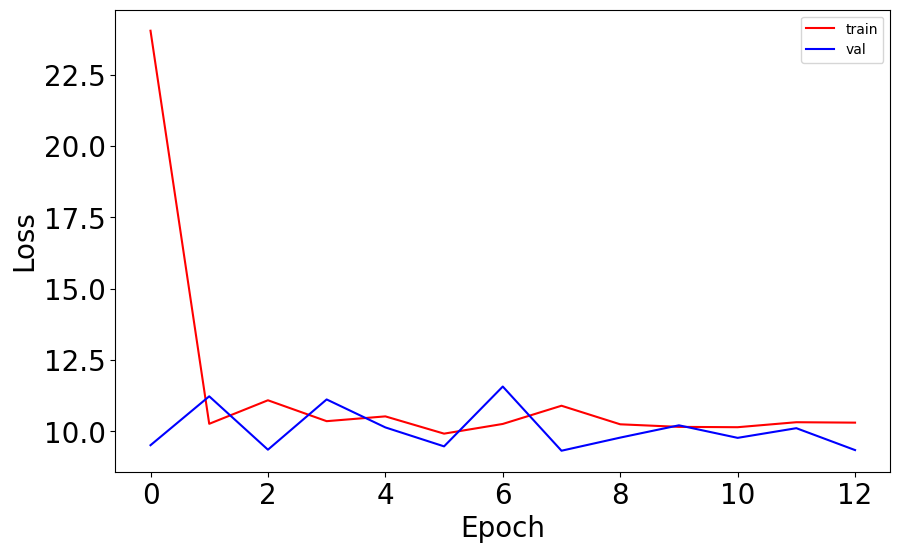

In [187]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

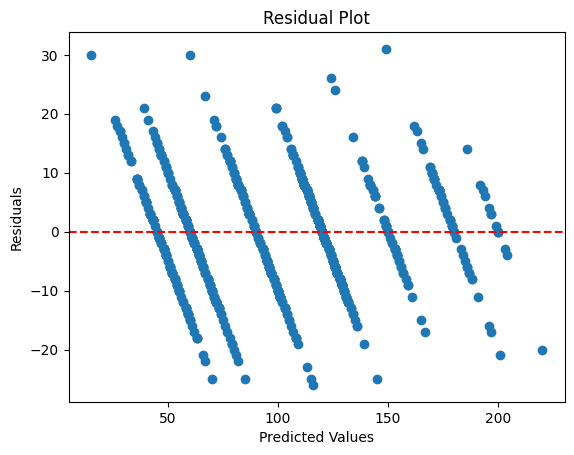

In [11]:
residuals = y_test - y_preds
plt.scatter(y_preds, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

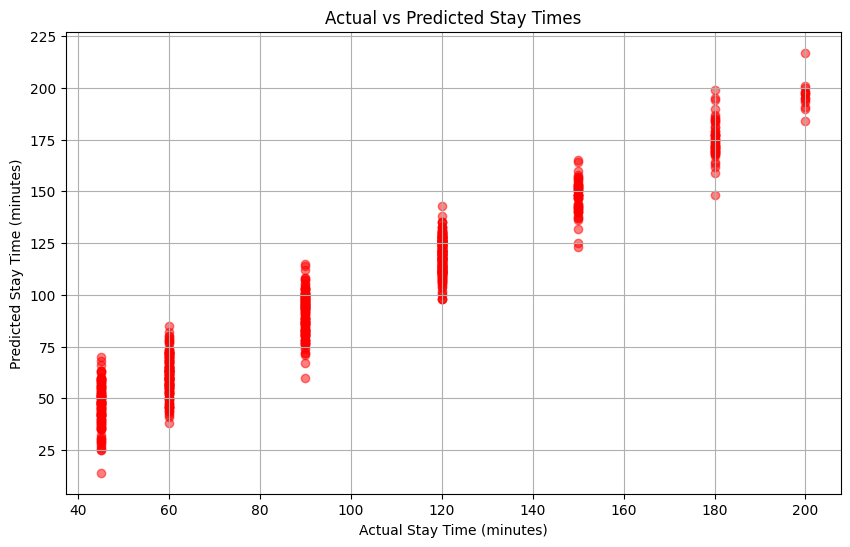

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.title('Actual vs Predicted Stay Times')
plt.xlabel('Actual Stay Time (minutes)')
plt.ylabel('Predicted Stay Time (minutes)')
plt.grid(True)
plt.show()

In [12]:
model.save("model.h5")

In [60]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
import tempfile
from keras.callbacks import ModelCheckpoint


# Create a checkpoint callback to save the best model
checkpoint = ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)

temp_dir = tempfile.TemporaryDirectory()
filepath = f"{temp_dir.name}/model.keras"

# Define a function to create your neural network model
def create_model(optimizer):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='linear'))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# clf = KerasRegressor(create_model)
# Wrap Keras model so it can be used by scikit-learn
keras_regressor = KerasRegressor(model=create_model('adam'), callbacks=[checkpoint])

# Define hyperparameters grid
param_grid = {
    'batch_size': [32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'sgd']
}

# Perform grid search
grid_search = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `tf.saved_model.save()` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=C:\Users\MSii\AppData\Local\Temp\tmph4x3w31r.

In [75]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras import optimizers

# Define the Keras model as a function
def create_model(learning_rate, activation, epochs, optimizer, batch_size, validation_split):
    model = Sequential()
    model.add(Dense(256, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dense(128, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(y_train.shape[1], activation='linear'))
    tf.saved_model.save(model.keras, "export/1")
    
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])
    return model

# Define the parameter grid
param_grid = {
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01]
}

# Create a KerasRegressor
keras_regressor = KerasRegressor(model=create_model(0.001, 'relu', 100, 'adam', 32, 0.2), epochs=100, batch_size=32, validation_split=0.2, learning_rate=0.001, activation='relu', optimizer='adam')

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=keras_regressor, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error')

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train, y_train)

# Get the best estimator
best_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

C:\Users\MSii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: 'Sequential' object has no attribute 'keras'